# Lecture 2.5: Text and Image Data

This lecture, we are going to focus on two new types of data: text, and images.  We'll learn the basic data exploration skills required to get started with the two most popular fields of Machine Learning, Natural Language Processing (NLP), and Computer Vision (CV).

**Learning goals:**

- string operations
- basic regular expressions
- tokenization
- image manipulation

## 1. Text Data

The internet contains almost all of our civilization's knowledge. Why don't we just explore that data and use it? In a twist of irony similar to that of the [library of Babel](https://en.wikipedia.org/wiki/The_Library_of_Babel), what makes this knowledge so difficult to access is the fact that there is so much information. Being able to summarise, visualize, and explore text data is difficult, because it cannot be numerically aggregated like tabular data (see lecture 2.3 & 2.4). Words are symbols, we need some solutions to get insights into the meaning encoded in their sequences.

One of the simplest tricks is to study the distribution of words. 

Seinfeld is a heritage of the 90s, and we'd like to revisit the era. The `Seinfeld.csv` dataset contains the transcript of all the dialogues of the first episode. Let's take a peek:

In [1]:
with open('seinfeld.csv', 'r') as f:
    lines = f.readlines()
lines[0]

'JERRY,"Do you know what this is all about? Do you know, why were here? To be out, this is out...and out is one of the single most enjoyable experiences of life. People...did you ever hear people talking about We should go out? This is what theyre talking about...this whole thing, were all out now, no one is home. Not one person here is home, were all out! There are people tryin to find us, they dont know where we are. (on an imaginary phone) Did you ring?, I cant find him. Where did he go? He didnt tell me where he was going. He must have gone out. You wanna go out you get ready, you pick out the clothes, right? You take the shower, you get all ready, get the cash, get your friends, the car, the spot, the reservation...Then youre standing around, whatta you do? You go We gotta be getting back. Once youre out, you wanna get back! You wanna go to sleep, you wanna get up, you wanna go out again tomorrow, right? Where ever you are in life, its my feeling, youve gotta go."\n'

What an introduction! We can see that the lines are formatted as such: `CHARACTER,CONTENT`. However, we wish to explore only the content. Let's cut off the character field by splitting the lines:

In [2]:
def remove_character(string):
    return ','.join(string.split(',')[1:])

dialogue = [remove_character(l) for l in lines]

🧠 The code above uses a [list comprehension](https://realpython.com/list-comprehension-python/). Can you step through what's happening?

In [3]:
dialogue[7]

'"Well, senator, Id just like to know, what you knew and when you knew it."\n'

The character is gone, but the lines end in a newline. Let's remove those as well:

In [4]:
dialogue = [l.strip('\n') for l in dialogue]

In [5]:
dialogue[7]

'"Well, senator, Id just like to know, what you knew and when you knew it."'

In [6]:
dialogue[8]

'Mr. Seinfeld. Mr. Costanza.'

It seems that _some_ of the lines start/end with a `"`. `.strip()` has the useful property of only executing if the character to remove is present. Let's use it for the `"`:

In [7]:
dialogue = [l.strip('"') for l in dialogue]

In [8]:
dialogue[7]

'Well, senator, Id just like to know, what you knew and when you knew it.'

In [9]:
dialogue[490]

'...32...'

The lines are getting cleaner, but now we have to deal with numbers and punctuation. We're interested in _word_ distributions, `32` doesn't tell us anything about Seinfeld! Let's filter numbers and punctuation:

In [10]:
import re

def filter_numbers(string):
    return re.sub(r'\d+', '', string)

dialogue = [filter_numbers(l) for l in dialogue]

In [11]:
dialogue[490]

'......'

Here, we used a regular expression, a.k.a [regex](https://regexr.com/). These are strings that define _search patterns_ in other strings. They are very useful when processing text data, but can get diabolically complicated! Thankfully, the one we need for filtering punctuation is straightforward:

In [12]:
def filter_punct(string):
    return re.sub(r'[^\w\s]', '', string)

dialogue = [filter_punct(l) for l in dialogue]

In [13]:
dialogue[492]

'I am challenging'

In [14]:
dialogue[490]

''

It seems we've ended up with some empty lines... Let's clean those up too:

In [15]:
dialogue = [l for l in dialogue if l]

In [16]:
dialogue[490]

'I am challenging'

Finally, let's lowercase our lines to normalise all word strings:

In [17]:
dialogue = [l.lower() for l in dialogue]

In [18]:
dialogue[490]

'i am challenging'

We're close to seeing word distributions! But first, we must decide what is a "word"... Depending on how clean the text is, there are many ways of splitting a string into a sequence of word units. In the field of NLP, these units are called "tokens", and the process is refered to as "tokenization". Let's tokenize our lines by whitespace, meaning we'll split the string wherever there is at least one whitespace:

In [19]:
def tokenize_whitespace(dialogue):
    tokens = []
    for l in dialogue:
        tokens.extend(l.split())
    return tokens


tokens = tokenize_whitespace(dialogue)
len(tokens)

6581

We have words! Now we can look at the ten most common tokens using a [Counter](https://pymotw.com/2/collections/counter.html):

In [20]:
from collections import Counter

Counter(tokens).most_common(10)

[('you', 275),
 ('the', 220),
 ('i', 214),
 ('to', 169),
 ('a', 148),
 ('is', 96),
 ('what', 87),
 ('it', 79),
 ('this', 75),
 ('know', 71)]

😐... All the most popular words are common words, like pronouns or determiners. This isn't really giving us insights into the show, or capturing the spirit of Seinfeld! We need more advanced text processing. One common solution is to remove [stopwords](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) from our tokens. But for this, we'll need to use a more powerful NLP library.

[Spacy](https://spacy.io/) is distinguishing itself as the leading NLP library in python. Let's try it out! It uses powerful ML models to do some of its text analysis, so we need to download those first:

In [21]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/bilalmotiwala/.local/share/virtualenvs/introduction-to-machine-learning-RiBp7zxe/lib/python3.8/site-packages/en_core_web_sm
-->
/home/bilalmotiwala/.local/share/virtualenvs/introduction-to-machine-learning-RiBp7zxe/lib/python3.8/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


Now we're ready to analyse! Spacy's philosophy is to condense all the text processing one might wish for in one method called `.nlp()` (more details in their [tutorial](https://spacy.io/usage/spacy-101)).

In [22]:
import spacy
nlp = spacy.load("en_core_web_sm")

with open('seinfeld.csv', 'r') as f:
    content = f.read()
doc = nlp(content)

Notice how we don't need to execute any of our manual processing, since `spacy` takes care of everything. All the text metadata is now available through the `doc` object. We can explore the word distribution by removing stopwords and non-alphabetic tokens:

In [23]:
for token in doc:
    if token.is_alpha and not token.is_stop:
        print(token.text) 

know
know
single
enjoyable
experiences
life
People
hear
people
talking
talking
thing
home
person
home
people
tryin
find
nt
know
imaginary
phone
ring
nt
find
nt
tell
going
gone
wanna
ready
pick
clothes
right
shower
ready
cash
friends
car
spot
reservation
standing
whatta
got
ta
getting
wanna
wanna
sleep
wanna
wanna
tomorrow
right
life
feeling
ve
got
ta
Georges
shirt
button
worst
possible
spot
second
button
literally
makes
breaks
shirt
look
high
mans
land
look
like
live
mother
GEORGE
course
try
buy
purple
liked
nt
actually
recall
considering
buttons
nt
recall
imaginary
microphone
Uh
time
senator
d
like
know
knew
knew
CLAIRE
Mr
Seinfeld
Costanza
sure
decaf
s
orange
indicator
missing
head
decaf
left
regular
right
decaf
left
regular
right
challenging
work
relax
cup
coffee
Claire
professional
waitress
CLAIRE
Trust
George
interest
seeing
caffeine
GEORGE
come
doin
second
tomorrow
s
uh
woman
comin
second
wait
second
coming
woman
coming
told
Laura
girl
met
Michigan
nt
thought
told
yes
teaches
pol

mans
like
meet
nt
think
artisan
craftsman
labourer
sort
ELAINE
Wall
street
high
finance
Bulls
Bears
people
Conneticut
ELAINE
happens
pretty
good
lookin
right
sir
ELAINE
s
hilarious
JERRY
s
fair
meet
guy
ELAINE
staked
health
club
huh
stakeout
find
better
stand
wall
kinda
crouch
big
plant
think
ve
relationship
lets
especially
ve
relationship
try
friends
difficult
nt
hard
know
know
tricks
like
magicians
trying
entertain
goes
Look
rabbit
goes
believe
card
Look
nt
saw
half
night
okay


This is feeling more "Seinfeld", but it's not easy to see. Let's turn it into a pretty wordcloud! ☁️

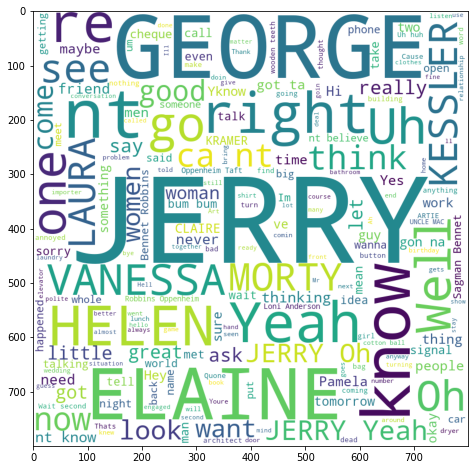

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

stopwords = set(STOPWORDS)
token_texts = [t.text for t in doc]
big_string = ' '.join(token_texts)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(big_string) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)

Very cool! But spacy also offers advanced linguistic visualizations out of the box. For example, we can show the dependency parse tree for the 42nd line of the dialogue:

In [25]:
from spacy import displacy

doc = nlp(lines[42])
displacy.render(doc, style="dep")

Or use `spacy` to annotate [entities](https://en.wikipedia.org/wiki/Named-entity_recognition) in the text:

In [26]:
doc2 = nlp(''.join(lines[120:130]))
displacy.render(doc2, style="ent")

So cool! Notice how `New York` is correctly tagged as a geo political entity, but George's laugh `ho` is erroneously labeled as such... This is because advanced NLP processing requires _models_. By definition, they are not perfect. This is important to note, because errors might affect downstream tasks. 

## 2. Image Data

How to Load and Display Images
How to Convert Images to NumPy Arrays and Back
How to Resize Images
How to Flip, Rotate, and Crop Images
How to Save Images to File

What's best, ice cream 🍦, or waffles 🧇? 

We have a dataset of 20 ice cream & 20 waffles images to figure it out. We choose the [pillow](https://python-pillow.org/) library to help us in this delicious venture.

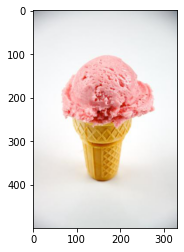

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('waffles_or_ice_cream/ice_cream/11.jpg')
plt.imshow(image)

Viewing an image is as simple as that! We are using pillow to read the `.jpg` file, and matplotlib to view it.  
Let's see a waffle next:

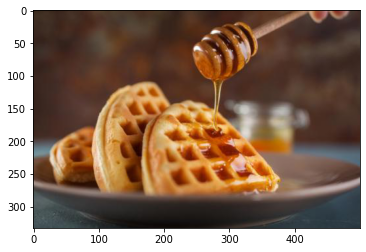

In [28]:
image = Image.open('waffles_or_ice_cream/waffles/9.jpg')
plt.imshow(image)

The image is distractingly appetizing, but can you notice the axes? They are numerically labeled. That's because images are just arrays! We can see it first hand by printing `image.size`:

In [29]:
print(image.size)

(500, 333)


We know another library that is particularly good at handling array data, NumPy. Let's convert our pillow [`Image`](https://pillow.readthedocs.io/en/stable/handbook/concepts.html) to an `ndarray`:

In [30]:
import numpy as np

data = np.asarray(image)
data.shape

(333, 500, 3)

Notice the `3`? This is a 3D array! This is because `RGB` images store 3 numerical values per pixel, one for each color. This might "feel" weird, since NumPy was originally designed for efficient linear algebra. But numbers is data, and images is matrices! In fact, we can display images directly using `ndarray`s:

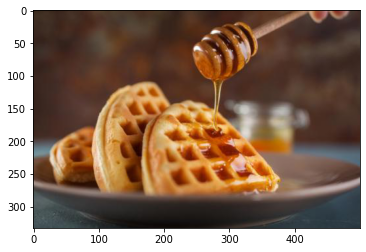

In [31]:
plt.imshow(data)

This means that we can manipulate images with our knowledge of NumPy indexing:

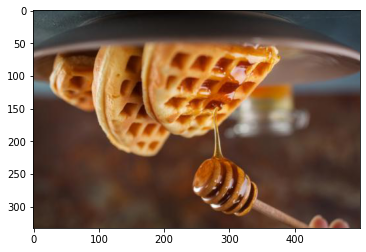

In [32]:
data_flip = data[::-1, :, :]
plt.imshow(data_flip)

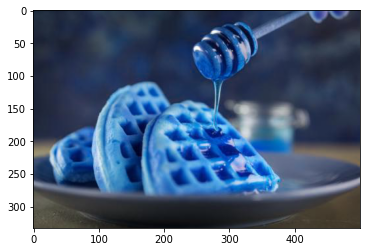

In [33]:
data_flip_color = data[:, :, ::-1]
plt.imshow(data_flip_color)

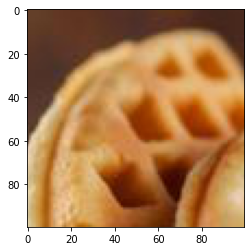

In [34]:
data_zoom = data[100:200, 100:200, :]
plt.imshow(data_zoom)

That blue waffle doesn't look quite as appetizing. 🙅‍♂️

pillow also offers convenient methods to carry out these common transformations:

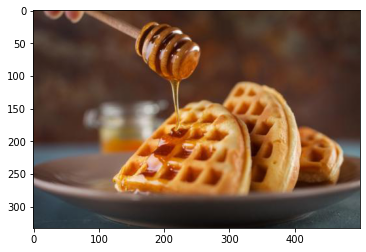

In [35]:
image_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(image_flip)

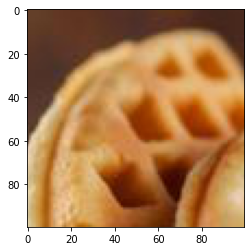

In [36]:
image_crop = image.crop((100, 100, 200, 200))
plt.imshow(image_crop)

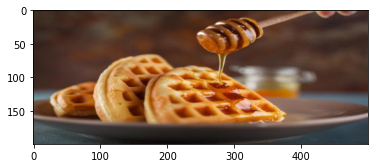

In [37]:
image_resize = image.resize((500,200))
plt.imshow(image_resize)

W I D E    W A F F L E 🤤

These operations might seem trivial, but they are important for Machine Learning. Datasets must be cleaned and normalised to be used for training. Also, a popular way to improve model accuracy in the field of [computer vision](https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e) is to use [data augmentation](https://bair.berkeley.edu/blog/2019/06/07/data_aug/). To augment image data, we commonly have to flip, rotate, fuzz, or change pixel values.

Let's save our wide waffle masterpiece:

In [38]:
image.save('waffles_or_ice_cream/waffles/wide_waffle.jpg')

Our waffles and ice creams image sizes are all over the place. Let's normalise the dataset by rescaling all of our images. 

💪 Create a new dataset, `waffles_or_ice_cream_norm` which contains all the `waffles_or_ice_cream` images resized to $100x100$ pixels. Go through the lecture 1.4 notebook if you need a refresher on data pipelines!

In [39]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

def file_name(path):
    return os.path.basename(path)

def resizing_images_ic(input_dir, output_dir):
    
    ice_cream_images = glob.glob('waffles_or_ice_cream/ice_cream/*.jpg')
    
    for path in ice_cream_images:
        image = Image.open(path)
        image_resize = image.resize((100,100))
        
        image_name = file_name(path)
        image_resize.save(output_dir + "/" + image_name)
        
def resizing_images_wa(input_dir, output_dir):
    
    waffles_images = glob.glob('waffles_or_ice_cream/waffles/*.jpg')
    
    for path in waffles_images:
        image = Image.open(path)
        image_resize = image.resize((100,100))
        
        image_name = file_name(path)
        image_resize.save(output_dir + "/" + image_name)

Now to Run the Above Code

In [40]:
def myoutput():
    !mkdir -p waffles_or_ice_cream_norm/ice_cream/
    !mkdir -p waffles_or_ice_cream_norm/waffles/
    !rm -f waffles_or_ice_cream_norm/ice_cream/*.jpg
    !rm -f waffles_or_ice_cream_norm/ice_cream/*.jpg
    resizing_images_ic('waffles_or_ice_cream/ice_cream', 'waffles_or_ice_cream_norm/ice_cream')
    resizing_images_wa('waffles_or_ice_cream/waffles', 'waffles_or_ice_cream_norm/waffles')
    
    #Now for a test to check if it actually did copy and do it.
    resolution_size = (100, 100)
    testimage = Image.open('waffles_or_ice_cream_norm/waffles/9.jpg')
    assert testimage.size == resolution_size, f'Incorrect Image Size! Expected (resolution_size) but got (testimage.size)'
    print('Success!')
    
myoutput()

Success!


Now to manually compare the difference between previous and a newly cropped copy of the image.

Original


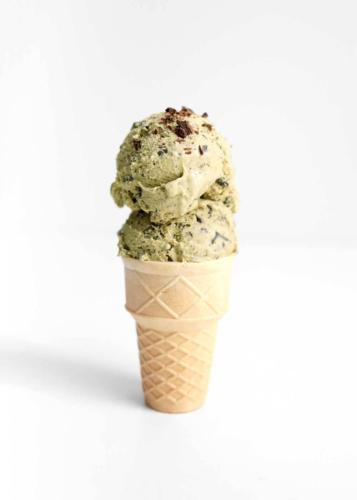

In [41]:
def print1():
    image = Image.open('waffles_or_ice_cream/ice_cream/1.jpg')
    print('Original')
    return image

print1()

Cropped to 100x100 px


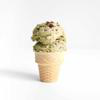

In [42]:
def print2():
    image_new = Image.open('waffles_or_ice_cream_norm/ice_cream/1.jpg')
    print('Cropped to 100x100 px')
    return image_new

print2()

## 4. Summary

Today, we learned about text and image processing. We cleaned a transcript from an episode of Seinfeld, first with simple string operations, and then with the spacy library. We also loaded, manipulated, and saved images with pillow.

# Resources

## Core Resources

- [Text processing in python](https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908)
- [Pillow tutorial](https://pillow.readthedocs.io/en/3.0.x/handbook/tutorial.html)
- [Kaggle dataset - seinfeld chronicles](https://www.kaggle.com/thec03u5/seinfeld-chronicles)
- [Kaggle dataset - waffles or ice cream](https://www.kaggle.com/sapal6/waffles-or-icecream)
        
## Additional Resources
        
- [ Text data processing walkthrough](https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html)
- [Guide to deal with text data](https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/)
- [Introduction to Natural Language Processing in python](https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63)
- [Load and manipulate images with pillow](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)
- [Advanced image processing with SciPy](https://scipy-lectures.org/advanced/image_processing/)